In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv('Call_Center_1999_DataSet.csv', encoding='UTF-8', sep=';')

C:\Users\ALUMNO\AppData\Local\Temp\ipykernel_13424\1386444106.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet.csv', encoding='UTF-8', sep=';')


In [6]:
df.head(3)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0


In [7]:
df.describe()

,call_id,priority,vru_time,q_time,ser_time,startdate
count,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,0.780143,10.286081,59.004304,152.561776,172.333974
std,13945.516813,0.888851,34.942136,119.470328,282.372761,104.559247
min,1169.000000,0.000000,-362.000000,0.000000,0.000000,0.000000
25%,21449.000000,0.000000,6.000000,0.000000,12.000000,90.000000
50%,35256.000000,0.000000,8.000000,16.000000,84.000000,181.000000
75%,42803.000000,2.000000,10.000000,79.000000,185.000000,273.000000
max,55656.000000,2.000000,4832.000000,28693.000000,61437.000000,334.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

In [12]:
# Verificamos duplicidades en el id de llamada
id_dupli = df[df.duplicated(subset='call_id', keep=False)]

In [14]:
id_dupli.head(3)


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0


In [16]:
registros = df[df['call_id']==33116]
registros
# Si bien hay valores duplicados son distintos los VRU

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
14852,AA0202,33116,0.0,0,NW,1999-01-14,16:45:23,16:45:32,9,16:45:32,16:46:18,46,HANG,0:00:00,0:00:00,0,NO_SERVER,0
31151,AA0204,33116,0.0,0,PS,1999-01-31,13:19:20,13:19:31,11,0:00:00,0:00:00,0,AGENT,13:19:30,13:23:10,220,DARMON,0
47117,AA0209,33116,30192405.0,2,PS,1999-02-12,10:29:27,10:29:32,5,10:29:32,10:30:02,30,AGENT,10:30:01,10:33:53,232,MICHAL,31
71059,AA0210,33116,0.0,0,NW,1999-03-04,14:37:03,14:37:12,9,14:37:12,14:37:26,14,HANG,0:00:00,0:00:00,0,NO_SERVER,59
90545,AA0102,33116,0.0,0,PS,1999-03-21,17:52:36,17:52:46,10,0:00:00,0:00:00,0,AGENT,17:52:45,17:57:59,314,STEREN,59
105282,AA0109,33116,25579707.0,1,PS,1999-04-04,10:09:56,10:10:01,5,10:10:01,10:11:41,100,HANG,0:00:00,0:00:00,0,NO_SERVER,90
115330,AA0110,33116,0.0,0,NW,1999-04-13,8:52:07,8:52:20,13,0:00:00,0:00:00,0,AGENT,8:52:19,8:54:00,101,MORIAH,90
215363,AA0103,33116,1472844.0,2,PS,1999-07-02,11:50:07,11:50:13,6,11:50:13,11:51:20,67,HANG,00:00:00,00:00:00,0,NO_SERVER,181
309235,AA0104,33116,0,0,NW,1999-09-14,08:40:09,08:40:19,10,08:40:19,08:42:57,158,AGENT,08:42:55,08:44:32,97,GOLDIE,243


In [18]:
# Verificamos que los registros no esten duplicados
duplicados = df[df.duplicated()]
duplicados

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate


In [21]:
df.head(5)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,1,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,1,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0
4,AA0101,33120,0.0,1,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0


In [20]:
# Asignamos 1 a los valores que tenian 0 debido al cambio en la nueva configuracion del campo
df['priority'].replace(0,1, inplace=True)

In [24]:
cant_llamadas = df['call_id'].count()
cant_llamadas

444448

In [25]:
cant_llamadas1 = df['call_id'].value_counts()
cant_llamadas1

call_id
37585    16
36947    16
36959    16
36958    16
36957    16
         ..
54438     1
54437     1
54436     1
54435     1
55656     1
Name: count, Length: 54471, dtype: int64

In [38]:
df['Nuevo_indice'] = df['vru.line']+ df['call_id'].astype(str)
df.head()

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate,Nuevo_indice
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0,AA010133116
1,AA0101,33117,0.0,1,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0,AA010133117
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0,AA010133118
3,AA0101,33119,0.0,1,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0,AA010133119
4,AA0101,33120,0.0,1,PS,1999-01-01,8:03:14,8:03:24,10,0:00:00,0:00:00,0,AGENT,8:03:23,8:05:10,107,MICHAL,0,AA010133120


In [40]:
cant_llamadas = df['Nuevo_indice'].value_counts()
cant_llamadas

Nuevo_indice
AA010133116    1
AA010645938    1
AA010645950    1
AA010645949    1
AA010645948    1
              ..
AA020240076    1
AA020240075    1
AA020240074    1
AA020240073    1
AA021617215    1
Name: count, Length: 444448, dtype: int64

In [41]:
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate',
       'Nuevo_indice'],
      dtype='object')

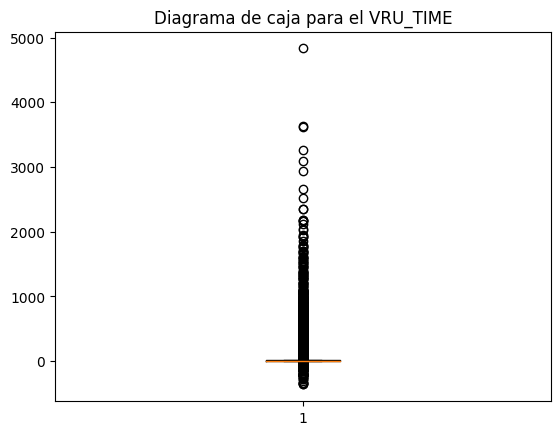

In [46]:
# determinacion de valores outliers para el tiempo en la VRU

q1= df['vru_time'].quantile(0.25)
q3= df['vru_time'].quantile(0.75)
iqr = q3-q1
umbral = 1.5 * iqr

outliers = df[(df['vru_time']<q1-umbral) | (df['vru_time']>q3+umbral)]
# outliers
plt.boxplot(df['vru_time'])
plt.title("Diagrama de caja para el VRU_TIME")
plt.show()

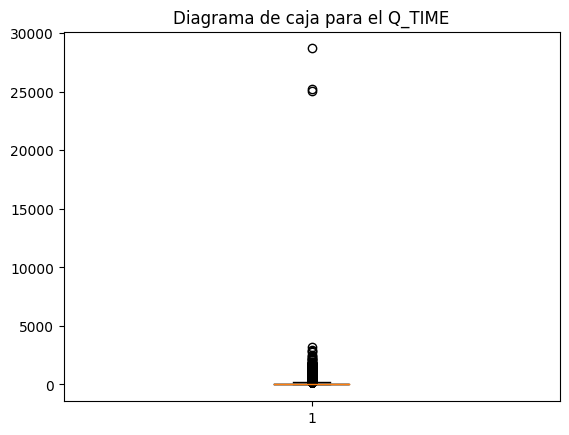

In [47]:
# determinacion de valores outliers para el tiempo en la Q_TIME

q1= df['q_time'].quantile(0.25)
q3= df['q_time'].quantile(0.75)
iqr = q3-q1
umbral = 1.5 * iqr

outliers = df[(df['q_time']<q1-umbral) | (df['q_time']>q3+umbral)]
# outliers
plt.boxplot(df['q_time'])
plt.title("Diagrama de caja para el Q_TIME")
plt.show()

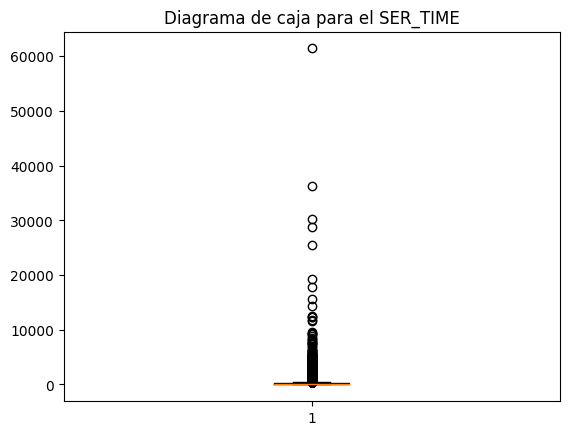

In [48]:
# determinacion de valores outliers para el tiempo en la SER_TIME

q1= df['ser_time'].quantile(0.25)
q3= df['ser_time'].quantile(0.75)
iqr = q3-q1
umbral = 1.5 * iqr

outliers = df[(df['ser_time']<q1-umbral) | (df['ser_time']>q3+umbral)]
# outliers
plt.boxplot(df['ser_time'])
plt.title("Diagrama de caja para el SER_TIME")
plt.show()

In [58]:
df['priority'].dtype 

dtype('int64')

In [59]:
df['vru_time'].dtype

dtype('int64')

In [62]:
df.to_csv('nuevo_call_center.csv', index=False)